# Data augmentation

Data augmentation is a crucial technique in machine learning, especially in deep learning, used to artificially increase the size and diversity of a training dataset. By generating new, varied examples from existing data, data augmentation helps improve the robustness and generalization capabilities of models. It mitigates overfitting, particularly when the available training data is limited or unbalanced. Augmented data allows models to learn from a wider range of scenarios, improving their performance on unseen data.


## Types of transformations
### Geometric Transforms
Geometric transforms involve changing the spatial configuration of an image. Common examples include:

Rotation: Rotating the image by a random angle.
Scaling: Resizing the image either up or down.
Cropping: Randomly selecting a portion of the image.
Translation: Shifting the image in the horizontal or vertical direction.
Flipping: Mirroring the image along a specific axis.
These transformations help the model become invariant to positional changes, meaning it can recognize an object regardless of its orientation, size, or position in the image.

### Photometric Transforms
Photometric transforms deal with altering the color and intensity values of an image. Examples include:

Brightness Adjustment: Changing the overall lightness of the image.
Contrast Adjustment: Enhancing or reducing the contrast between light and dark regions.
Color Jitter: Randomly changing the hue, saturation, or brightness.
Gaussian Noise: Adding random noise to simulate real-world imperfections.
These transformations help the model become robust to variations in lighting conditions, color distortions, and noise, which are common in real-world scenarios.

## On Label Preserving Transforms

<div class="alert alert-info" role="alert">
  Label preserving transforms are transformations that <b>modify the input data while keeping the label or target output unchanged. </b> The purpose is to enhance the training data without altering the underlying information that the model needs to learn. For instance, if an image of a cat is flipped horizontally, it’s still a cat, and its label remains the same.
</div>


In object detection and segmentation tasks, label preserving transforms must also correctly modify the associated labels, such as bounding boxes or segmentation masks, to match the transformed images. For example, if an image is rotated, the bounding box coordinates must be adjusted accordingly to preserve the label integrity.

In [ ]:
# run this cell first
!git clone https://github.com/mikedataCrunch/GMS5204.git
!mv ./GMS5204/* .
!rm ./GMS5204

In [ ]:
!pip install albumentations

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2

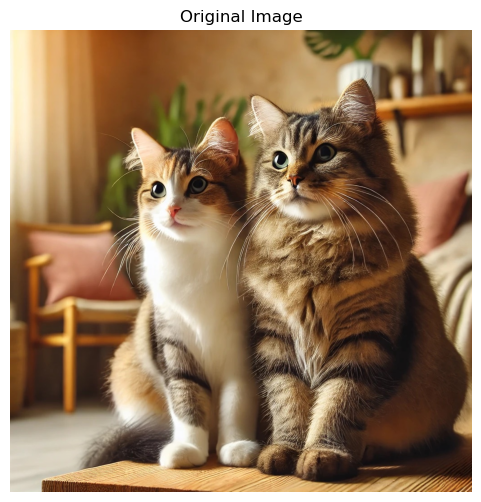

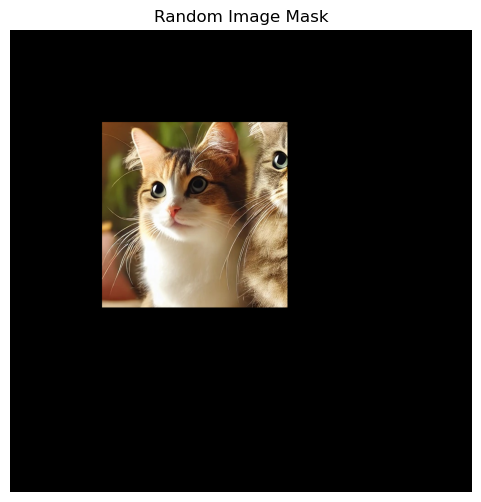

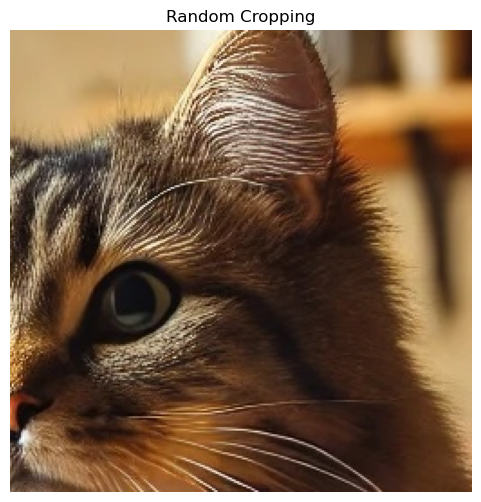

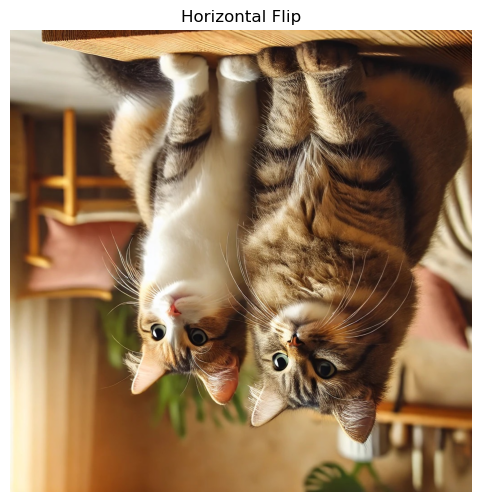

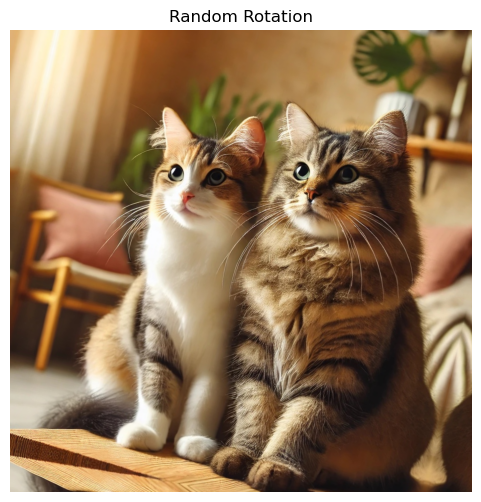

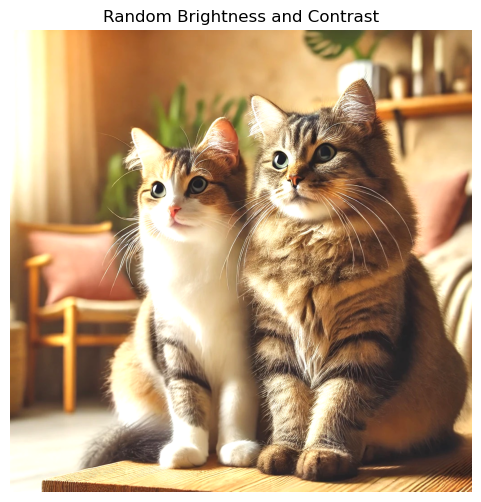

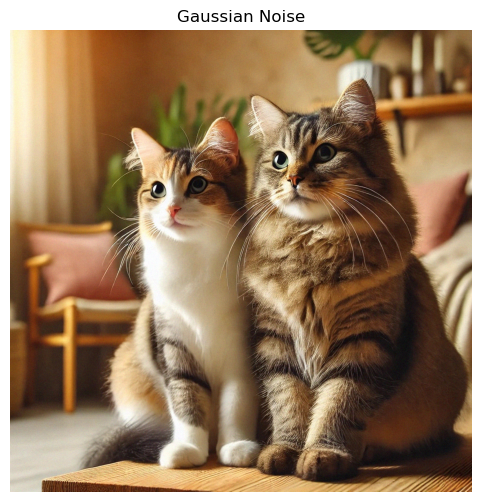

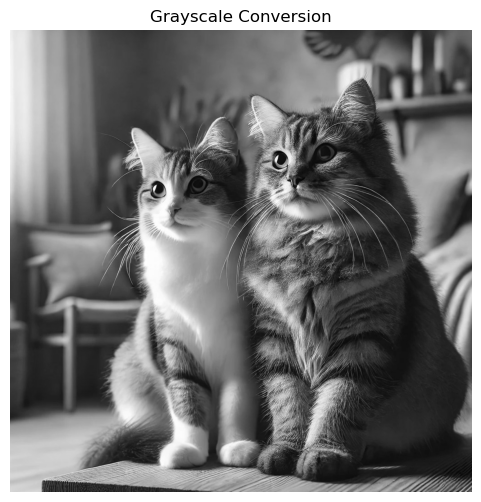

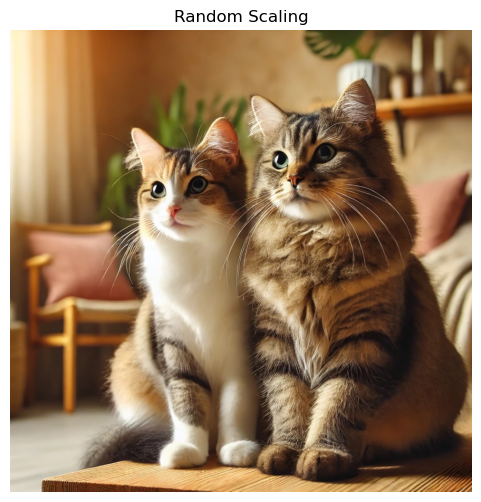

In [11]:
def show_image(title, image):
    """Helper function to display an image."""
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the input image
image_path = '/content/media/two_cats.jpeg'  # Replace with your image path
image = cv2.imread(image_path)

# 1. Random Image Mask
mask = np.zeros_like(image)
h, w = image.shape[:2]
cv2.rectangle(mask, (int(w*0.2), int(h*0.2)), (int(w*0.6), int(h*0.6)), (255, 255, 255), -1)  # Create a random rectangular mask
masked_image = cv2.bitwise_and(image, mask)

# 2. Random Cropping
random_crop = A.RandomCrop(width=256, height=256)(image=image)['image']

# 3. Horizontal Flip
horizontal_flip = A.HorizontalFlip(p=1)(image=image)['image']

# 4. Vertical Flip
vertical_flip = A.VerticalFlip(p=1)(image=image)['image']

# 5. Random Rotation
random_rotation = A.Rotate(limit=30, p=1)(image=image)['image']

# 6. Random Brightness and Contrast
random_brightness_contrast = A.RandomBrightnessContrast(p=1)(image=image)['image']

# 7. Gaussian Noise
gaussian_noise = A.GaussNoise(p=1)(image=image)['image']

# 8. Grayscale Conversion
grayscale = A.ToGray(p=1)(image=image)['image']

# 9. Random Scaling
random_scaling = A.RandomScale(scale_limit=0.5, p=1)(image=image)['image']

# Show the original image
show_image('Original Image', image)

# Show transformations
show_image('Random Image Mask', masked_image)
show_image('Random Cropping', random_crop)
show_image('Horizontal Flip', horizontal_flip)
show_image('Vertical Flip', vertical_flip)
show_image('Random Rotation', random_rotation)
show_image('Random Brightness and Contrast', random_brightness_contrast)
show_image('Gaussian Noise', gaussian_noise)
show_image('Grayscale Conversion', grayscale)
show_image('Random Scaling', random_scaling)


## End.